In [436]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [437]:
df = pd.read_csv("RedditShortDemoSurvey-1-Cleaned.csv")

In [438]:
df

,Entry Id,Please indicate your gender.,Please select the category that includes your age.,What is your marital status?,What best describes your employment status?,Are you or have you ever been in military service?,Do you currently have children under the age of 18 living in your household?,What best describes your level of education?,Treated country data,(For U. S. redditors) In which state do you live?,Which one of the following ranges includes your total yearly household income before taxes?,treated subreddit data,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?",Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,1,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",getmotivated,none,none,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,none,none,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Female,18-24,Blank,Freelance,none,No,Some college,United States,Virginia,"Under $20,000",snackexchange,none,none,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Male,25-34,Blank,Freelance,none,No,Bachelor's degree,United States,New York,"$150,000 or more",spacedicks,none,none,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Female,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,California,"$70,000 - $99,999",aww,none,none,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Male,25-34,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,I like dogs.,Cheddar,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Male,25-34,In a relationship,Employed full time,No,No,Some college,Germany,NaN,none,python,I like dogs.,Cheddar,NaN,NaN,NaN,NaN,NaN,NaN
7,8,Male,18-24,Married/civil union/domestic partnership,"Not employed, but looking for work",No,No,Bachelor's degree,United States,California,"$70,000 - $99,999",fffffffuuuuuuuuuuuu,I like dogs.,American,NaN,NaN,NaN,NaN,NaN,NaN
8,9,Male,35-44,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",todayilearned,I like cats.,Provolone,NaN,NaN,NaN,NaN,NaN,NaN
9,10,Male,25-34,In a relationship,Freelance,No,No,Some college,Germany,NaN,"$70,000 - $99,999",NaN,I like cats.,Munster,NaN,NaN,NaN,NaN,NaN,NaN


In [439]:
df.shape

(32754, 20)

In [440]:
df.columns

Index([u'Entry Id', u'Please indicate your gender.',
       u'Please select the category that includes your age.',
       u'What is your marital status?',
       u'What best describes your employment status?',
       u'Are you or have you ever been in military service?',
       u'Do you currently have children under the age of 18 living in your household?',
       u'What best describes your level of education?',
       u'Treated country data',
       u'(For U. S. redditors) In which state do you live?',
       u'Which one of the following ranges includes your total yearly household income before taxes?',
       u'treated subreddit data', u'Are you a dog or a cat person?',
       u'If you were a cheese, what cheese would you be?', u'Unnamed: 14',
       u'Unnamed: 15', u'Unnamed: 16', u'Unnamed: 17', u'Unnamed: 18',
       u'Unnamed: 19'],
      dtype='object')

#### Dropping the unwanted columns

In [441]:
df = df.drop(["Unnamed: 19", "Unnamed: 18", "Unnamed: 17", "Unnamed: 16", "Unnamed: 15", "Unnamed: 14","Entry Id",
              "(For U. S. redditors) In which state do you live?", "treated subreddit data"], axis=1)

In [442]:
df.head()

,Please indicate your gender.,Please select the category that includes your age.,What is your marital status?,What best describes your employment status?,Are you or have you ever been in military service?,Do you currently have children under the age of 18 living in your household?,What best describes your level of education?,Treated country data,Which one of the following ranges includes your total yearly household income before taxes?,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?"
0,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,"$150,000 or more",none,none
1,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,"$150,000 or more",none,none
2,Female,18-24,Blank,Freelance,none,No,Some college,United States,"Under $20,000",none,none
3,Male,25-34,Blank,Freelance,none,No,Bachelor's degree,United States,"$150,000 or more",none,none
4,Female,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,"$70,000 - $99,999",none,none


In [443]:
X = pd.DataFrame()
X["gender"] = df["Please indicate your gender."]
X["age"] = df["Please select the category that includes your age."]
X["marital"] = df["What is your marital status?"]
X["employment"] = df["What best describes your employment status?"]
X["military"] = df["Are you or have you ever been in military service?"]
X["children"] = df["Do you currently have children under the age of 18 living in your household?"]
X["education"] = df["What best describes your level of education?"]
X["country"] = df["Treated country data"]
X["income"] = df["Which one of the following ranges includes your total yearly household income before taxes?"]
X["dog_or_cat"] = df["Are you a dog or a cat person?"]
X["cheese"] = df["If you were a cheese, what cheese would you be?"]

In [444]:
X.columns

Index([u'gender', u'age', u'marital', u'employment', u'military', u'children',
       u'education', u'country', u'income', u'dog_or_cat', u'cheese'],
      dtype='object')

#### Aggregating countries to continents

In [445]:
X.country.describe()

count             32754
unique              440
top       United States
freq              20967
Name: country, dtype: object

In [446]:
X.country.value_counts()

United States                       20967
Canada                               2888
United Kingdom                       1782
Australia                            1051
Germany                               407
New Zealand                           315
Sweden                                309
Norway                                288
Ireland                               242
Finland                               188
Denmark                               182
none                                  177
India                                 154
France                                142
The Netherlands                       141
Netherlands                           134
Belgium                               119
Poland                                112
Brazil                                111
Mexico                                108
Spain                                 100
canada                                 97
Portugal                               87
Switzerland                       

In [447]:
Asia=['Afghanistan' ,'Armenia','Azerbaijan','Bahrain','Bangladesh' ,'Bhutan' ,
      'Brunei', 'Cambodia','China', 'Cyprus' , 'Georgia', 'India', 'Indonesia' , 'Iran', 'Iraq', 'Israe' , 'Japan', 
      'Jordan' , 'Kazakhstan' , 'Kuwait', 'Kyrgyzstan' , 'Laos', 'Lebanon', 'Malaysia' , 'Maldives', 'Mongolia', 'Myanmar' ,
      'Nepal' ,'North Korea', 'Oman','Pakistan', 'Palestine' ,'Philippines', 'Qatar','Russia', 'Saudi Arabia', 'Singapore',
      'South Korea','Sri Lanka', 'Syria' , 'Taiwan', 'Tajikistan' , 'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 
      'United Arab Emirates', 'Uzbekistan' , 'Vietnam' , 'Yemen','Israel','Kuwait','india','thailand', 'Korea, South'
      'JAPAN', 'INDIA','japan','malaysia','Hong Kong'
     ]
Africa=[
    'Algeria','Angola','Benin','Botswana','Burkina Faso','Burundi','Cabo Verde',
'Cameroon','Central African Republic','Chad',
'Comoros','Democratic Republic of the Congo','Republic of the Congo',
'Cote d Ivoire','Djibouti','Egypt','Equatorial Guinea','Eritrea','Ethiopia','Gabon','Gambia','Ghana','Guinea',
'Guinea-Bissau','Kenya','Lesotho','Liberia','Libya','Madagascar','Malawi','Mali','Mauritania','Mauritius','Morocco',
'Mozambique','Namibia','Niger','Nigeria', 'Rwanda','Sao Tome and Principe','Senegal','Seychelles','Sierra Leone',
'Somalia','South Africa','South Sudan','Sudan','Swaziland' ,'Tanzania','Togo','Tunisia','Uganda' ,'Zambia','Zimbabwe'
        ]
Antartica=['Antarctica']
Australia=['Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand', 'Palau',
           'Papua New Guinea' ,'Samoa', 'Solomon Islands' ,'Tonga' ,'Tuvalu' ,'Vanuatu','australia']
Europe=['United kingom','United kingdom ','Croatua','switzerland','ITALY IT','england','England','SPAIN','Itaky',
        'Scotland and Sweden','NORWAY', 'DENMARK','Austria','austria'
       'United kingdom of great britain and northern Ireland','Unitd Kingdom',
        'british virgin islands','BG','Denmark ','Serbia','serbia','UNited Kingdom','Galiza','The Netherlands','Netherlands, the',
       'Belgrium', 'slovenia','united kingdom / scotland', 'United Kingdom of Great Britain','uk','Czech republic',
        'United Kingdo,','Great Britian ','the Netherlands (a.k.a. Holland)',
        'Slovak Republic','Norway.','Australia and United Kingdom','IRELAND','England (United Kingdom is not a country)',
        'Bosnia And Herzegovina','Catalonia','new Zealand ','Newzealand ', 'FUNLAND','Belgrium','slovenia',
        'Republic of Ireland','Republic of Ireland ','BELGIUM','Peoples Republic of South Yorkshire',
        'United Kingdon', 'wales','norway', 'Swedeb','Netehrlands','Kingdom of Norway',
         'Holland','Federal Republic of Germany','United Kingdom (England)', 'United KIngdom',
        'England','Scotland','FRANCE','romania','Northern Ireland','sweden','Sweden',
        'Federal Republic of Germany','The NEtherlands','denmark','FUNLAND','Belgrium','Nether',
        'Commonwealth of the Northern Mariana Islands','Helsinki','U.K lol', 'scotland',
        'UK','U.K.','estonia','London United Kingdom','Frande','poland', 'U.K. Problem?',
        'Lithuania/United Kingdom','Kosova','Kosovo','U.K','United ','Denmark','United Kingdom','Belgium','Italy','italy','Romania',
           'Germany', 'France', 'Greece', 'Switzerland','Netherlands', 'Bulgaria', 'Spain', 'Poland', 'Finland',
         'the Netherlands','Slovenia','Iceland','Bosnia and Herzegovina','Croatia','united kingdom',
          'New Zealand','Estonia','Puerto Rico','Portugal','Slovakia','Ukraine', 'Macedonia','Czech Republic',
        'Lithuania','United Kingdom (Scotland)','Swiss','Bermuda','Dominica','United Jingdom', 'Gibraltar', 'ireland',
         'Hungary','Uninted Kingdom','Isle of Man','Luxembourg','Swedem','Wales', 'Latvia', 'POLAND',
           'u.k', 'United  Kingdom', 'spain', 'germany','new zealand','Equestria',
           'United Kingdom of Great Britain and Northern Ireland','Republic of Poland', 'Honduras','ENGLAND', 'GErmany', 'greece',  
         'Ger','finland','iceland','belgium', 'Sweden ','Republic Of Ireland','England ','Great Britain','New zealand', 'New Zealand ',
        'The United Kingdom of Great Britain and Northern Ireland','Albania',
        'Grand Duchy of Baden','United Kingdown','Faroe Islands','Portugal',
       'Untied Kingdom ', 'The Czech Republic','Montenegro','Antigua and Barbuda','United Kindom',' United Kingdom',
        'The Republic of Ireland', 'Australia ','Andorra','czech republic','Untied Kingdom','St.Vincent', 'Ireland ',
        'united kingdom of great Britain ','UNITED KINGDOM','united kingdom ','Unted Kingdom','New Zealanad','United Knigdom', 
        'Finland ', 'netherlands','The Netherlands ','Bosnia and Herzegowina','united kingdom, Spain ',
        'ITALY','croatia','Belarus','United Kingdom, India','Portugal ',
          'Ireland','United Kingdom ','Malta','france','United kingdom,England, United Kingdom','United kingdom',
            'England, United Kingdom','Germany ','Republic of Moldova','the netherlands',
            'United Kingdom of Great Britain & Northern Ireland','Frabce','Swden','Moldova']
North_America=['United States','canada','Trinidad and TObago','Commonwealth of the Northern Mariana Islands',
               'Republic of the Marshall Islands','united states of America ','Amurika',
               'Belgium/Canada','america','haiti','United Strate','Canada, Eh','United s',
               'The Dominion of Canada','United States (Guam)','Ontario, Canada','united states (my state is APO) ',
               'Mx','Mexico','mexico','Canada, Bitches.','United States of America (Washington, DC)',
               'United States of America (WASHINGTON DC, Y U NO LISTED?)','US OF A','U.S','USA ','California',
               "United States (apparently I can't put D.C. as my state)",'united states', 'united states :f',
               'United States, District of Columbia','U S A','USVI','america','united Sr','Idaho'
               ,'Canada (currently Korea)','Canada','CANADA','Norway',
               'United states of America. ','Costa Rica','M\xc3\xa9xico','Barbados','Canada, eh?',
                'United states of America', 'United States of ', 
                'United States of America (DC)','Trinidad & Tobago',
                'Belize','Dominion of Canada', 'Toronto','El Salvador','Canadia','Trinidad and Tobago',
                'Cayman Islands','Amerikka', 'Guatemala','United States ', 'US','united stateds','Amerikka', 'Guatemala','MEXICO  ',
               'United States of America: Guam. No option for territories :(','United states',
                'Sint Maarten','united sates','The United States of America','Usa', 'United st','Mexico ',
                'united States','Unnited States','Bahamas',' Canada','canada ', 'United States of America ', 
                'United States Of America', 'Guam', 'usa','greenland','Camada','U.S.A.','Canda','Unites States','Panama',
              'United Sates','Canada ','united states of america','United States of America', 'Cananda',
              'United States of American','United States (Washington, DC)','united states of American', 
               'Nicaragua','MEXICO','USA',' Canada eh'] 
South_America=['Chile','Argentina','Bolivia','Brazil','Colombia','Ecuador',
               'French Guiana','Guyana','Paraguay','brazil','Brasil','chile','Uruguay ','venezuela','Peru','Suriname','argentina','colombia','Venezuela',
               'ecuador','Brazilf','Uruguay']

In [448]:
Continents = []
NOT_present=[]
for i in X['country']:
    cont=''
    try:
        cont=transformations.cn_to_ctn(i)
        Continents.append[cont]
    except:
        if(i in Asia):
            cont="Asia"
            Continents.append(cont)
        elif(i in Africa):
            cont="Africa"
            Continents.append(cont)
        elif(i in Australia):
            cont="Australia"
            Continents.append(cont)
        elif(i in Antartica): 
            cont="Antartica"
            Continents.append(cont)
        elif(i in Europe):
            cont="Europe"
            Continents.append(cont)
        elif(i in North_America):
            cont="North America"
            Continents.append(cont)
        elif(i in South_America):
            cont="South America"
            Continents.append(cont)
        else:
            cont="None" 
            Continents.append(cont) 
            NOT_present.append(i)

In [449]:
X['country']=Continents
X.head(10)

,gender,age,marital,employment,military,children,education,country,income,dog_or_cat,cheese
0,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,North America,"$150,000 or more",none,none
1,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,North America,"$150,000 or more",none,none
2,Female,18-24,Blank,Freelance,none,No,Some college,North America,"Under $20,000",none,none
3,Male,25-34,Blank,Freelance,none,No,Bachelor's degree,North America,"$150,000 or more",none,none
4,Female,25-34,Blank,Employed full time,none,No,Bachelor's degree,North America,"$70,000 - $99,999",none,none
5,Male,25-34,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,North America,"$150,000 or more",I like dogs.,Cheddar
6,Male,25-34,In a relationship,Employed full time,No,No,Some college,Europe,none,I like dogs.,Cheddar
7,Male,18-24,Married/civil union/domestic partnership,"Not employed, but looking for work",No,No,Bachelor's degree,North America,"$70,000 - $99,999",I like dogs.,American
8,Male,35-44,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,North America,"$150,000 or more",I like cats.,Provolone
9,Male,25-34,In a relationship,Freelance,No,No,Some college,Europe,"$70,000 - $99,999",I like cats.,Munster


In [450]:
X.describe()

,gender,age,marital,employment,military,children,education,country,income,dog_or_cat,cheese
count,32754,32754,32754,32754,32754,32754,32754,32754,32754,32752,32754
unique,3,8,7,7,3,3,8,8,9,7,17
top,Male,18-24,Single,Employed full time,No,No,Bachelor's degree,North America,"Under $20,000",I like dogs.,Other
freq,26418,15802,10428,14814,30526,27488,11046,24597,7892,17149,6562


In [451]:
columns = ['gender', 'age', 'marital', 'employment', 'military', 'children', 'education', 'country', 'income', 'dog_or_cat', 'cheese']

for column in columns:
    print column, X[column].unique()
    print " "

gender ['Male' 'Female' 'None']
 
age ['25-34' '18-24' '35-44' '45-54' 'Under 18' '55-64' '65 or Above' 'None']
 
marital ['Blank' 'Married/civil union/domestic partnership' 'In a relationship'
 'Forever Alone' 'Single' 'Engaged' 'Widowed']
 
employment ['Employed full time' 'Freelance' 'Not employed, but looking for work'
 'Not employed and not looking for work' 'Student' 'None' 'Retired']
 
military ['none' 'No' 'Yes']
 
children ['No' 'Yes' 'None']
 
education ["Bachelor's degree" 'Some college' 'High school graduate or equivalent'
 'Graduate or professional degree' 'Trade or Vocational degree'
 'Associate degree' 'Some high school' 'None']
 
country ['North America' 'Europe' 'Australia' 'Asia' 'South America' 'None'
 'Africa' 'Antartica']
 
income ['$150,000 or more' 'Under $20,000' '$70,000 - $99,999' 'none'
 '$40,000 - $49,999' '$50,000 - $69,999' '$100,000 - $149,999'
 '$20,000 - $29,999' '$30,000 - $39,999']
 
dog_or_cat ['none' 'I like dogs.' 'I like cats.' 'I like turtles.' n

In [452]:
def clean_gender(z):
    if z == "Male":
        return "m"
    elif z == "Female":
        return "f"
    else:
        return "None"
    
X["gender"] = X["gender"].apply(clean_gender)

In [453]:
def clean_military(z):
    if z == "Yes":
        return 1
    elif z == "No":
        return 0
    else:
        return "None"
    
X["military"] = X["military"].apply(clean_military)

In [454]:
def clean_children(z):
    if z == "Yes":
        return 1
    elif z == "No":
        return 0
    else:
        return "None"
    
X["children"] = X["children"].apply(clean_children)

In [455]:
def clean_dog_cat_column(z):
    if z == "I like cats.":
        return "cats"
    elif z == "I like dogs.":
        return "dogs"
    else:
        return "None"
    
X["dog_or_cat"] = X["dog_or_cat"].apply(clean_dog_cat_column)

In [456]:
def clean_cheese(z):
    if z == "none":
        return "None"
    elif z == " awww":
        return "None"
    elif z == " f7u12":
         return "None"   
    elif z == "programming":
        return "None"
    elif z == "1":
        return "None"
    elif z == " Pics":
        return "None"
    else:
        return z
X["cheese"] = X["cheese"].apply(clean_cheese)

In [457]:
columns = ['gender', 'age', 'marital', 'employment', 'military', 'children', 'education', 'country', 'dog_or_cat', 'income', 'cheese']

for column in columns:
    print column, X[column].unique()
    print " "

gender ['m' 'f' 'None']
 
age ['25-34' '18-24' '35-44' '45-54' 'Under 18' '55-64' '65 or Above' 'None']
 
marital ['Blank' 'Married/civil union/domestic partnership' 'In a relationship'
 'Forever Alone' 'Single' 'Engaged' 'Widowed']
 
employment ['Employed full time' 'Freelance' 'Not employed, but looking for work'
 'Not employed and not looking for work' 'Student' 'None' 'Retired']
 
military ['None' 0 1]
 
children [0 1 'None']
 
education ["Bachelor's degree" 'Some college' 'High school graduate or equivalent'
 'Graduate or professional degree' 'Trade or Vocational degree'
 'Associate degree' 'Some high school' 'None']
 
country ['North America' 'Europe' 'Australia' 'Asia' 'South America' 'None'
 'Africa' 'Antartica']
 
dog_or_cat ['None' 'dogs' 'cats']
 
income ['$150,000 or more' 'Under $20,000' '$70,000 - $99,999' 'none'
 '$40,000 - $49,999' '$50,000 - $69,999' '$100,000 - $149,999'
 '$20,000 - $29,999' '$30,000 - $39,999']
 
cheese ['None' 'Cheddar' 'American' 'Provolone' 'Munst

In [458]:
X.gender.value_counts()

m       26418
f        6135
None      201
Name: gender, dtype: int64

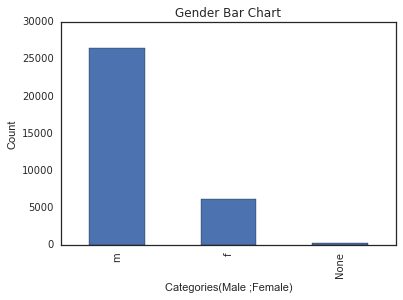

In [459]:
gender = X.gender.value_counts().plot(kind = 'bar' )
gender.set_title("Gender Bar Chart")
gender.set_xlabel("Categories(Male ;Female)")
gender.set_ylabel("Count")

In [460]:
X.age.value_counts()

18-24          15802
25-34          11575
Under 18        2330
35-44           2257
45-54            502
55-64            140
None              88
65 or Above       60
Name: age, dtype: int64

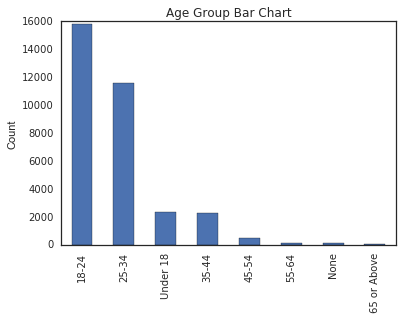

In [461]:
age= X.age.value_counts().plot(kind = 'bar' )
age.set_title("Age Group Bar Chart")
age.set_xlabel("")
age.set_ylabel("Count")

In [462]:
X.marital.value_counts()

Single                                      10428
In a relationship                            9828
Forever Alone                                5850
Married/civil union/domestic partnership     5490
Engaged                                      1109
Widowed                                        44
Blank                                           5
Name: marital, dtype: int64

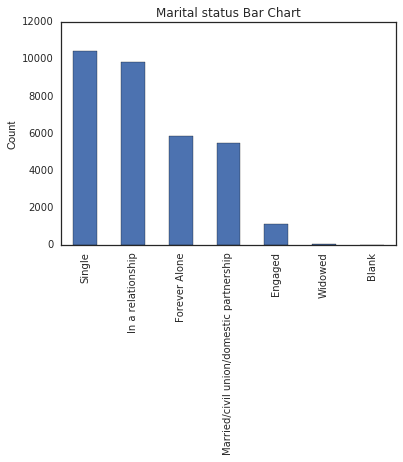

In [463]:
marital= X.marital.value_counts().plot(kind = 'bar' )
marital.set_title("Marital status Bar Chart")
marital.set_xlabel("")
marital.set_ylabel("Count")

In [464]:
X.employment.value_counts()

Employed full time                       14814
Student                                  12987
Not employed, but looking for work        2087
Freelance                                 1948
Not employed and not looking for work      682
None                                       151
Retired                                     85
Name: employment, dtype: int64

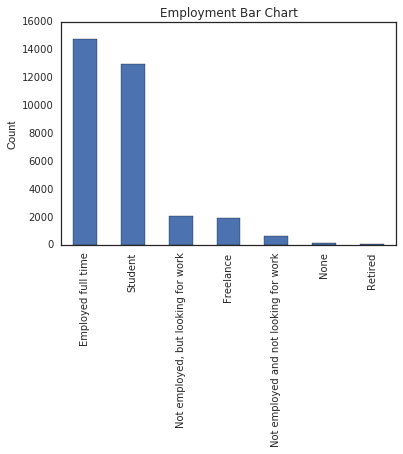

In [466]:
emp= X.employment.value_counts().plot(kind = 'bar' )
emp.set_title("Employment Bar Chart")
emp.set_xlabel("")
emp.set_ylabel("Count")

In [467]:
X.military.value_counts()

0       30526
1        2223
None        5
Name: military, dtype: int64

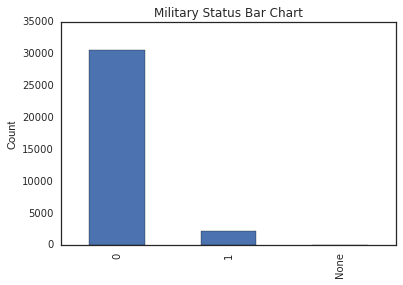

In [468]:
mil= X.military.value_counts().plot(kind = 'bar' )
mil.set_title("Military Status Bar Chart")
mil.set_xlabel("")
mil.set_ylabel("Count")

In [469]:
X.children.value_counts()

0       27488
1        5047
None      219
Name: children, dtype: int64

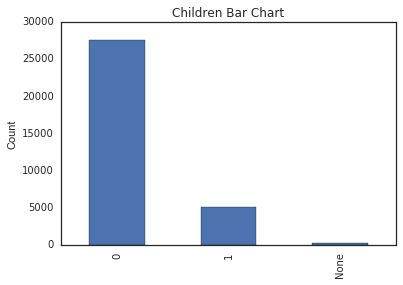

In [470]:
child= X.children.value_counts().plot(kind = 'bar' )
child.set_title("Children Bar Chart")
child.set_xlabel("")
child.set_ylabel("Count")

In [471]:
X.education.value_counts()

Bachelor's degree                     11046
Some college                           9600
Graduate or professional degree        4722
High school graduate or equivalent     3272
Some high school                       1924
Associate degree                       1411
Trade or Vocational degree              635
None                                    144
Name: education, dtype: int64

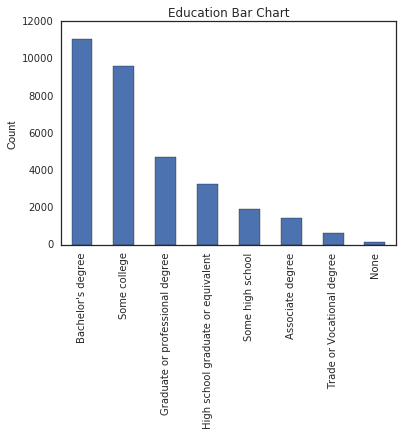

In [472]:
edu= X.education.value_counts().plot(kind = 'bar' )
edu.set_title("Education Bar Chart")
edu.set_xlabel("")
edu.set_ylabel("Count")

In [473]:
X.country.value_counts()

North America    24597
Europe            5247
Australia         1392
Asia               841
South America      281
None               279
Africa             115
Antartica            2
Name: country, dtype: int64

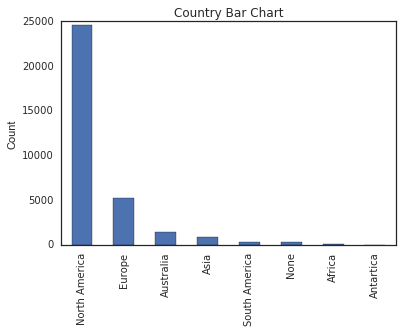

In [474]:
ctry= X.country.value_counts().plot(kind = 'bar' )
ctry.set_title("Country Bar Chart")
ctry.set_xlabel("")
ctry.set_ylabel("Count")

In [475]:
X.income.value_counts()

Under $20,000          7892
$50,000 - $69,999      4133
$70,000 - $99,999      4101
$100,000 - $149,999    3522
$20,000 - $29,999      3206
$30,000 - $39,999      2904
$150,000 or more       2695
$40,000 - $49,999      2686
none                   1615
Name: income, dtype: int64

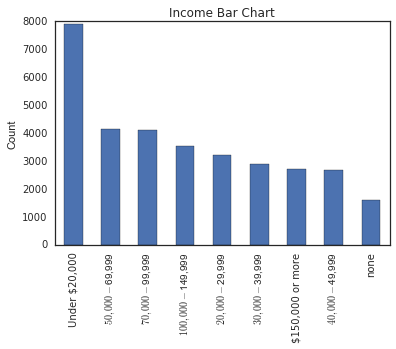

In [476]:
inc= X.income.value_counts().plot(kind = 'bar' )
inc.set_title("Income Bar Chart")
inc.set_xlabel("")
inc.set_ylabel("Count")

In [477]:
X.dog_or_cat.value_counts()

dogs    17149
cats    11152
None     4453
Name: dog_or_cat, dtype: int64

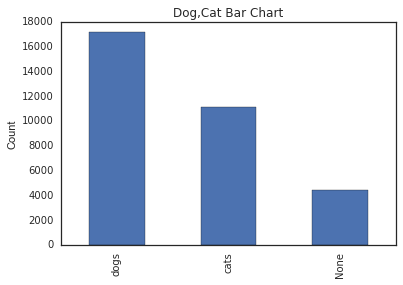

In [478]:
dc= X.dog_or_cat.value_counts().plot(kind = 'bar' )
dc.set_title("Dog,Cat Bar Chart")
dc.set_xlabel("")
dc.set_ylabel("Count")

In [479]:
X.cheese.value_counts()

Other            6562
Cheddar          6101
Brie             3742
Provolone        3454
Swiss            3214
Feta             2991
Goat             2516
Munster          1770
American         1438
Paneer            618
Limburger         337
None               10
programming')       1
Name: cheese, dtype: int64

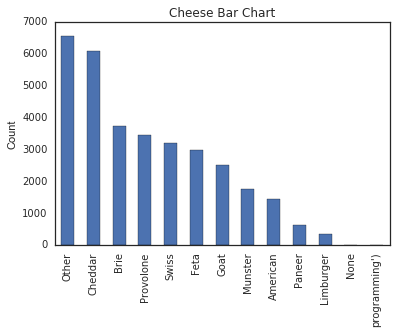

In [480]:
chese= X.cheese.value_counts().plot(kind = 'bar' )
chese.set_title("Cheese Bar Chart")
chese.set_xlabel("")
chese.set_ylabel("Count")

In [486]:
X2 = X.copy()

In [487]:
categorical_variables = X2.columns

for variable in categorical_variables:
    X2[variable].fillna("Blank", inplace=True)
    dummies = pd.get_dummies(X2[variable], prefix=variable)
    X2 = pd.concat([X2, dummies], axis=1)
    X2.drop([variable], axis=1, inplace=True)

In [488]:
X2.head()

,gender_None,gender_f,gender_m,age_18-24,age_25-34,age_35-44,age_45-54,age_55-64,age_65 or Above,age_None,...,cheese_Feta,cheese_Goat,cheese_Limburger,cheese_Munster,cheese_None,cheese_Other,cheese_Paneer,cheese_Provolone,cheese_Swiss,cheese_programming')
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


#### Using Pearson's Correlation Coefficient

In [490]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [491]:
X3 = X2.copy()
X2.describe()

,gender_None,gender_f,gender_m,age_18-24,age_25-34,age_35-44,age_45-54,age_55-64,age_65 or Above,age_None,...,cheese_Feta,cheese_Goat,cheese_Limburger,cheese_Munster,cheese_None,cheese_Other,cheese_Paneer,cheese_Provolone,cheese_Swiss,cheese_programming')
count,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,...,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000
mean,0.006137,0.187305,0.806558,0.482445,0.353392,0.068908,0.015326,0.004274,0.001832,0.002687,...,0.091317,0.076815,0.010289,0.054039,0.000305,0.200342,0.018868,0.105453,0.098125,0.000031
std,0.078097,0.390162,0.395002,0.499699,0.478030,0.253301,0.122849,0.065239,0.042761,0.051764,...,0.288064,0.266302,0.100912,0.226098,0.017471,0.400262,0.136061,0.307141,0.297489,0.005525
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [492]:
sns.set(style="white")

In [493]:
d = pd.DataFrame(data=X2,
                 columns=X2.columns)

In [494]:
corr = d.corr()
corr

,gender_None,gender_f,gender_m,age_18-24,age_25-34,age_35-44,age_45-54,age_55-64,age_65 or Above,age_None,...,cheese_Feta,cheese_Goat,cheese_Limburger,cheese_Munster,cheese_None,cheese_Other,cheese_Paneer,cheese_Provolone,cheese_Swiss,cheese_programming')
gender_None,1.000000,-0.037724,-0.160452,-0.035184,0.002427,-0.001313,-0.003439,-0.005148,0.014919,0.381091,...,0.003590,-0.009454,-0.004138,0.033091,-0.001373,-0.000262,0.000596,-0.011705,0.000364,-0.000434
gender_f,-0.037724,1.000000,-0.980288,0.047638,-0.032750,-0.027108,0.009537,0.010528,0.017864,-0.008289,...,0.047477,0.083378,-0.023358,-0.010913,0.009527,-0.043812,0.017970,-0.022154,-0.038142,-0.002653
gender_m,-0.160452,-0.980288,1.000000,-0.040098,0.031868,0.027036,-0.008741,-0.009381,-0.020595,-0.067160,...,-0.047605,-0.080487,0.023890,0.004236,-0.009139,0.043327,-0.017868,0.024197,0.037602,0.002706
age_18-24,-0.035184,0.047638,-0.040098,1.000000,-0.713762,-0.262653,-0.120453,-0.063257,-0.041361,-0.050112,...,0.004880,-0.025429,-0.014279,-0.001602,-0.002883,-0.012640,-0.020725,0.000922,0.024322,-0.005335
age_25-34,0.002427,-0.032750,0.031868,-0.713762,1.000000,-0.201115,-0.092232,-0.048436,-0.031670,-0.038371,...,0.011309,0.031627,-0.000059,-0.004662,0.005360,0.000326,0.032204,0.012349,-0.031518,0.007474
age_35-44,-0.001313,-0.027108,0.027036,-0.262653,-0.201115,1.000000,-0.033940,-0.017824,-0.011654,-0.014120,...,-0.008830,0.015674,0.003318,-0.012777,0.002145,0.021630,-0.001404,-0.017270,-0.009914,-0.001503
age_45-54,-0.003439,0.009537,-0.008741,-0.120453,-0.092232,-0.033940,1.000000,-0.008174,-0.005345,-0.006475,...,-0.009353,-0.002390,0.006982,-0.005636,-0.002180,0.005854,-0.008168,-0.006423,0.013986,-0.000689
age_55-64,-0.005148,0.010528,-0.009381,-0.063257,-0.048436,-0.017824,-0.008174,1.000000,-0.002807,-0.003401,...,-0.002899,0.003947,0.011870,-0.005310,-0.001145,0.001113,-0.009086,-0.002687,-0.002733,-0.000362
age_65 or Above,0.014919,0.017864,-0.020595,-0.041361,-0.031670,-0.011654,-0.005345,-0.002807,1.000000,-0.002223,...,-0.001187,0.009092,0.009783,0.002393,-0.000749,-0.000037,-0.005941,-0.005410,0.002670,-0.000237
age_None,0.381091,-0.008289,-0.067160,-0.050112,-0.038371,-0.014120,-0.006475,-0.003401,-0.002223,1.000000,...,0.001974,-0.010542,0.000553,0.063246,-0.000907,-0.008296,-0.002863,-0.008219,-0.007207,-0.000287


In [495]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

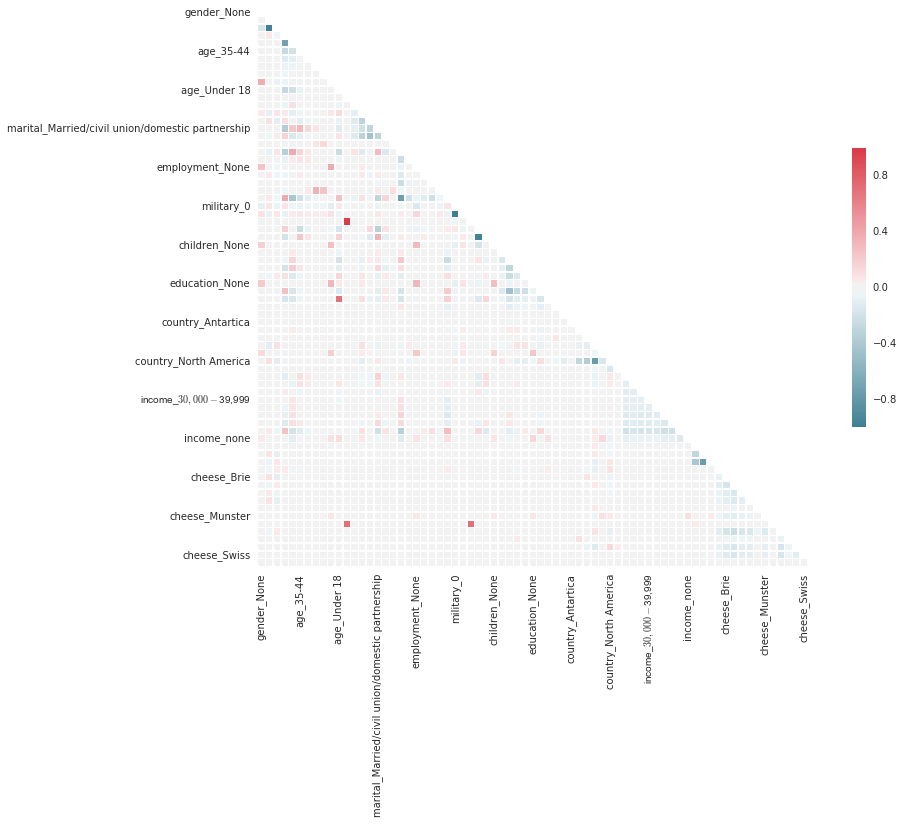

In [497]:
f, ax = plt.subplots(figsize=(13, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

#### My last name starts with D, so my dependent variable is Employment

In [498]:
corr.stack().sort_values()

military_1                                        military_0                                         -0.998795
military_0                                        military_1                                         -0.998795
gender_f                                          gender_m                                           -0.980288
gender_m                                          gender_f                                           -0.980288
children_0                                        children_1                                         -0.975109
children_1                                        children_0                                         -0.975109
country_North America                             country_Europe                                     -0.758420
country_Europe                                    country_North America                              -0.758420
dog_or_cat_cats                                   dog_or_cat_dogs                                    -0.753211
d

In [499]:
X_forest = X.copy()
X_forest.drop(["country"], axis=1, inplace=True)
X_forest.columns

Index([u'gender', u'age', u'marital', u'employment', u'military', u'children',
       u'education', u'income', u'dog_or_cat', u'cheese'],
      dtype='object')

In [500]:
categorical_variables = X_forest.columns

for variable in categorical_variables:
    X_forest[variable].fillna("None", inplace=True)
    dummies = pd.get_dummies(X_forest[variable], prefix=variable)
    X_forest = pd.concat([X_forest, dummies], axis=1)
    X_forest.drop([variable], axis=1, inplace=True)

In [502]:
X_forest.columns

Index([u'gender_None', u'gender_f', u'gender_m', u'age_18-24', u'age_25-34',
       u'age_35-44', u'age_45-54', u'age_55-64', u'age_65 or Above',
       u'age_None', u'age_Under 18', u'marital_Blank', u'marital_Engaged',
       u'marital_Forever Alone', u'marital_In a relationship',
       u'marital_Married/civil union/domestic partnership', u'marital_Single',
       u'marital_Widowed', u'employment_Employed full time',
       u'employment_Freelance', u'employment_None',
       u'employment_Not employed and not looking for work',
       u'employment_Not employed, but looking for work', u'employment_Retired',
       u'employment_Student', u'military_0', u'military_1', u'military_None',
       u'children_0', u'children_1', u'children_None',
       u'education_Associate degree', u'education_Bachelor's degree',
       u'education_Graduate or professional degree',
       u'education_High school graduate or equivalent', u'education_None',
       u'education_Some college', u'education_Some hi

In [503]:
X_forest.drop(["employment_Freelance","employment_None","employment_Not employed and not looking for work",
                  "employment_Not employed, but looking for work","employment_Retired","employment_Student"],
              axis=1, inplace=True)
y = X_forest.pop("employment_Employed full time")

In [504]:
def printall(X, max_rows=10):
    from IPython.display import display, HTML
    display(HTML(X.to_html(max_rows=max_rows)))
printall(X_forest)

,gender_None,gender_f,gender_m,age_18-24,age_25-34,age_35-44,age_45-54,age_55-64,age_65 or Above,age_None,age_Under 18,marital_Blank,marital_Engaged,marital_Forever Alone,marital_In a relationship,marital_Married/civil union/domestic partnership,marital_Single,marital_Widowed,military_0,military_1,military_None,children_0,children_1,children_None,education_Associate degree,education_Bachelor's degree,education_Graduate or professional degree,education_High school graduate or equivalent,education_None,education_Some college,education_Some high school,education_Trade or Vocational degree,"income_$100,000 - $149,999","income_$150,000 or more","income_$20,000 - $29,999","income_$30,000 - $39,999","income_$40,000 - $49,999","income_$50,000 - $69,999","income_$70,000 - $99,999","income_Under $20,000",income_none,dog_or_cat_None,dog_or_cat_cats,dog_or_cat_dogs,cheese_American,cheese_Brie,cheese_Cheddar,cheese_Feta,cheese_Goat,cheese_Limburger,cheese_Munster,cheese_None,cheese_Other,cheese_Paneer,cheese_Provolone,cheese_Swiss,cheese_programming')
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32749,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32750,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
32751,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
32752,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [506]:
X_forest.columns

Index([u'gender_None', u'gender_f', u'gender_m', u'age_18-24', u'age_25-34',
       u'age_35-44', u'age_45-54', u'age_55-64', u'age_65 or Above',
       u'age_None', u'age_Under 18', u'marital_Blank', u'marital_Engaged',
       u'marital_Forever Alone', u'marital_In a relationship',
       u'marital_Married/civil union/domestic partnership', u'marital_Single',
       u'marital_Widowed', u'military_0', u'military_1', u'military_None',
       u'children_0', u'children_1', u'children_None',
       u'education_Associate degree', u'education_Bachelor's degree',
       u'education_Graduate or professional degree',
       u'education_High school graduate or equivalent', u'education_None',
       u'education_Some college', u'education_Some high school',
       u'education_Trade or Vocational degree', u'income_$100,000 - $149,999',
       u'income_$150,000 or more', u'income_$20,000 - $29,999',
       u'income_$30,000 - $39,999', u'income_$40,000 - $49,999',
       u'income_$50,000 - $69,999', 

In [507]:
y

0        1.0
1        1.0
2        0.0
3        0.0
4        1.0
5        1.0
6        1.0
7        0.0
8        1.0
9        0.0
10       0.0
11       1.0
12       1.0
13       0.0
14       1.0
15       0.0
16       1.0
17       0.0
18       1.0
19       1.0
20       0.0
21       0.0
22       1.0
23       1.0
24       0.0
25       0.0
26       1.0
27       0.0
28       1.0
29       0.0
        ... 
32724    0.0
32725    1.0
32726    0.0
32727    0.0
32728    0.0
32729    0.0
32730    0.0
32731    0.0
32732    0.0
32733    1.0
32734    0.0
32735    1.0
32736    0.0
32737    1.0
32738    1.0
32739    0.0
32740    0.0
32741    0.0
32742    0.0
32743    0.0
32744    0.0
32745    1.0
32746    0.0
32747    0.0
32748    1.0
32749    0.0
32750    1.0
32751    1.0
32752    1.0
32753    1.0
Name: employment_Employed full time, dtype: float64

In [509]:
model = RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state=60)
model.fit(X_forest, y)
print "C-stat: ", roc_auc_score(y, model.oob_prediction_)

C-stat:  0.826113248729
